# Imports

In [1]:
import gensim
import os
# os.environ['KERAS_BACKEND'] = 'theano'
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
import pandas as pd
import numpy as np

import utils
import models

Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='5'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Parameters

In [3]:
num_tokens = 10
batch_size = 128
hidden_size = 256
learning_rate = 0.001
num_features = 3
num_epochs = 3

# Data

In [4]:
indexedSplitData, indexDicts = utils.load_data("NER-datasets-master/CONLL2003/train.txt", num_tokens)


DF Shape:  (219553, 4)


# Model

In [5]:
fm = models.NER_Model(num_tokens, indexDicts, batch_size, hidden_size, learning_rate, num_features)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10, 128)      2400768     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 10, 128)      5888        input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (I

In [6]:
fm.fit([
        indexedSplitData['train_sentences_X'], 
        indexedSplitData['train_poses'],
        indexedSplitData['train_entposes']
       ],
       indexedSplitData['train_tags_y'], num_epochs)

Train on 13091 samples, validate on 3273 samples
Epoch 1/3
 - 12s - loss: 0.6876 - acc: 0.8378 - val_loss: 0.3465 - val_acc: 0.9001
Epoch 2/3
 - 3s - loss: 0.2272 - acc: 0.9303 - val_loss: 0.1622 - val_acc: 0.9529
Epoch 3/3
 - 3s - loss: 0.0955 - acc: 0.9740 - val_loss: 0.1110 - val_acc: 0.9675


# Confusion Matrix

In [7]:
predictions = fm.predict_class([
        indexedSplitData['test_sentences_X'], 
        indexedSplitData['test_poses'],
        indexedSplitData['test_entposes']
       ])

In [12]:
target_names = [indexDicts['index2tag'][x] for x in indexDicts['index2tag']]

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

[[ 1143    21    32     5     1     1     2    21    28]
 [   27   818     3     2     1    21     9     6    20]
 [   11     1  1289    17     7    22    19    56    12]
 [    7     0    35   544    13     2     5    40    27]
 [    6     7     2    10   136    20    11     4    29]
 [    1    13     0     0     9   505    13    22    31]
 [    1     3     4     4     1    31   151     2     1]
 [   43     1    52    14     3    36     0  1061    43]
 [   42    13    35    48    47    88    11    72 34026]]


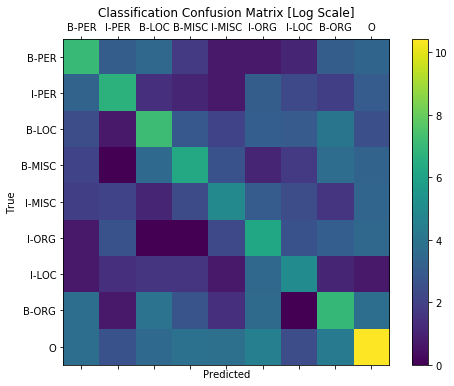

In [13]:
temp = confusion_matrix(np.reshape(predictions, [-1]), np.reshape(indexedSplitData['test_tags_y'], [-1]))
print(temp)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(np.log(temp + 1))
#cax = ax.matshow((temp))
#ax.set_title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Classification Confusion Matrix [Log Scale]")
plt.show()

In [14]:
print (classification_report(np.reshape(predictions, [-1]), np.reshape(indexedSplitData['test_tags_y'], [-1]), 
                             target_names=target_names))


             precision    recall  f1-score   support

      B-PER       0.89      0.91      0.90      1254
      I-PER       0.93      0.90      0.92       907
      B-LOC       0.89      0.90      0.89      1434
     B-MISC       0.84      0.81      0.83       673
     I-MISC       0.62      0.60      0.61       225
      I-ORG       0.70      0.85      0.77       594
      I-LOC       0.68      0.76      0.72       198
      B-ORG       0.83      0.85      0.84      1253
          O       0.99      0.99      0.99     34382

avg / total       0.97      0.97      0.97     40920

